In [23]:
# Importando las librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importando los datos
df = pd.read_excel('case_fit_regression_model.xlsx')
X0 = df[["Temp", "Stir", "Time"]]
y = df.Viscosity

# Estandarizado de datos
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X0)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X2 = poly.fit_transform(X)
X2

array([[ 7.40097678e-01, -9.64892127e-01,  9.32582436e-01, ...,
         9.31016817e-01, -8.99841451e-01,  8.69710000e-01],
       [ 1.11046691e+00, -1.15155689e+00, -2.53572264e-02, ...,
         1.32608327e+00,  2.92002888e-02,  6.42988929e-04],
       [ 6.09379127e-01, -1.19822308e+00,  6.93097521e-01, ...,
         1.43573856e+00, -8.30485448e-01,  4.80384173e-01],
       ...,
       [-1.67309749e+00, -3.82218066e-01, -1.64499371e+00, ...,
         1.46090650e-01,  6.28746314e-01,  2.70600431e+00],
       [-1.46603931e+00, -4.23797642e-01, -1.34626023e+00, ...,
         1.79604441e-01,  5.70541909e-01,  1.81241660e+00],
       [-1.49192158e+00, -3.12918772e-01, -1.50273967e+00, ...,
         9.79181577e-02,  4.70235452e-01,  2.25822652e+00]])

In [26]:
# Separar en conjunto de entrenamiento y testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=27)

In [27]:
from sklearn.model_selection import cross_val_score

# Define a function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print("CV Mean: ", np.mean(scores))
    print("STD: ", np.std(scores))
    print("\n")

In [28]:
from sklearn.linear_model import LinearRegression
# Train the OLS model
lr= LinearRegression()

In [29]:
lr = LinearRegression().fit(X_train, y_train)

In [30]:
lr.coef_

array([ 361.67935155, -260.54988374,  517.3843017 , -133.48068462,
       -112.75306688,  502.83994109,  -21.57749085,  139.94649633,
       -327.33704798])

In [31]:
lr.intercept_

1877.8861138905024

In [19]:
terms = ['Temp', 'Stir', 'Time', 'Temp*Temp','Temp*Stir', 'Temp*Time', 'Stir*Stir', 'Stir*Time', 'Time*Time']

In [32]:
for coef, term in enumerate(terms):
    print(f'{term}:{lr.coef_[coef]}')

Temp:361.67935155121535
Stir:-260.5498837371895
Time:517.3843017016654
Temp*Temp:-133.4806846176311
Temp*Stir:-112.75306687635671
Temp*Time:502.8399410937386
Stir*Stir:-21.57749085366353
Stir*Time:139.94649632738108
Time*Time:-327.33704798468284


In [33]:
poly_scores = get_cv_scores(lr)
print("Train Score: ", lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))

CV Mean:  0.772557708258784
STD:  0.04021853726499732


Train Score:  0.7936656149142187
Test Score:  0.7708731506462041


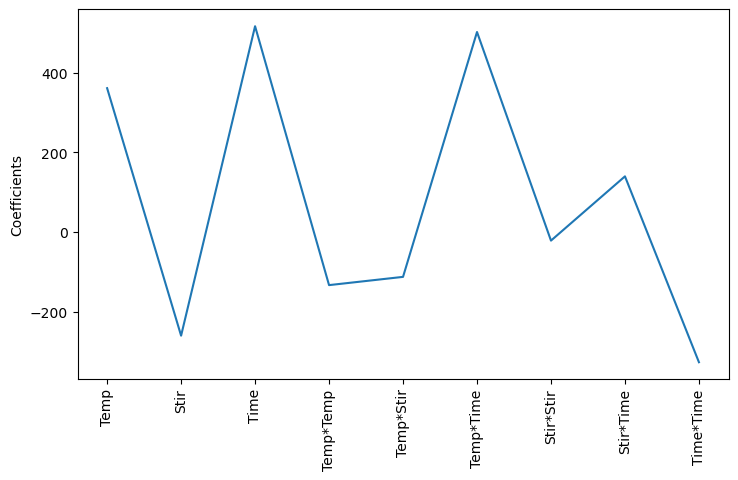

In [34]:
_ = plt.figure(figsize=[8.4,4.8])
_ = plt.plot(range(len(terms)), lr.coef_)
_ = plt.xticks(range(len(terms)), terms, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show()

# Pruebas con Ridge, Lasso y ElasticNet
En la regression polinomial se pueden implementar los modelos de regularizacion vistos en OLS tales como Ridge, Lasso y ElasticNet y se implementan de la misma manera. A continuacion un ejemplo solo con ridge

In [35]:
from sklearn.linear_model import Ridge

# Train Ridge model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)

# Get cross val scores
get_cv_scores(ridge)
print("Train Score: ", ridge.score(X_train, y_train))
print("Test Score: ", ridge.score(X_test, y_test))

CV Mean:  0.7729938840625181
STD:  0.038843177174234626


Train Score:  0.7934733102999025
Test Score:  0.7711375560355337


In [36]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=np.logspace(-4,4,9))
ridge = ridge.fit(X_train, y_train)
ridge.alpha_

0.1

In [37]:
ridge

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]))

In [38]:
# get cv scores
get_cv_scores(ridge)
print("Train Score: ", ridge.score(X_train, y_train))
print("Test Score: ", ridge.score(X_test, y_test))

CV Mean:  0.7719023232693141
STD:  0.03934662386844912


Train Score:  0.7936629596959577
Test Score:  0.770915909043205


In [39]:
ridge.intercept_

1876.0325514380309

In [40]:
ridge.coef_

array([ 359.79407363, -261.01018353,  517.98477124, -129.25479498,
       -110.41584735,  493.22534413,  -20.95762127,  136.68564748,
       -321.85972529])

In [41]:
for coef, term in enumerate(terms):
    print(f'{term}:{ridge.coef_[coef]}')

Temp:359.79407363067
Stir:-261.01018352519895
Time:517.9847712372721
Temp*Temp:-129.25479497548258
Temp*Stir:-110.41584734593562
Temp*Time:493.22534412919777
Stir*Stir:-20.957621274144913
Stir*Time:136.68564748346034
Time*Time:-321.85972528508864


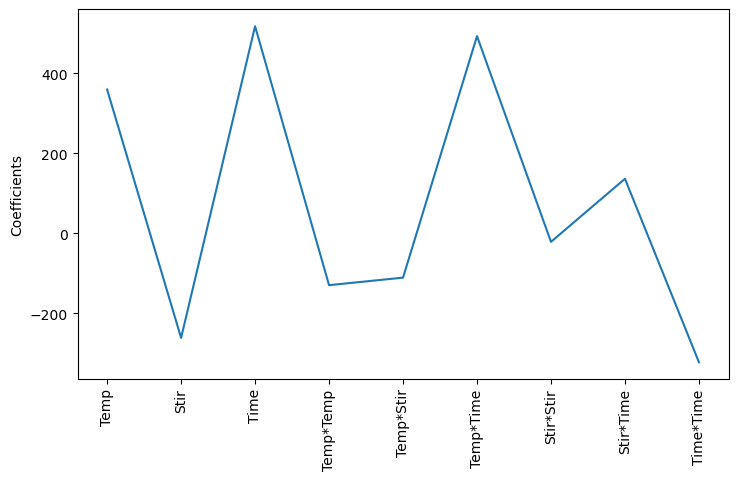

In [42]:
_ = plt.figure(figsize=[8.4,4.8])
_ = plt.plot(range(len(terms)), ridge.coef_)
_ = plt.xticks(range(len(terms)), terms, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show()